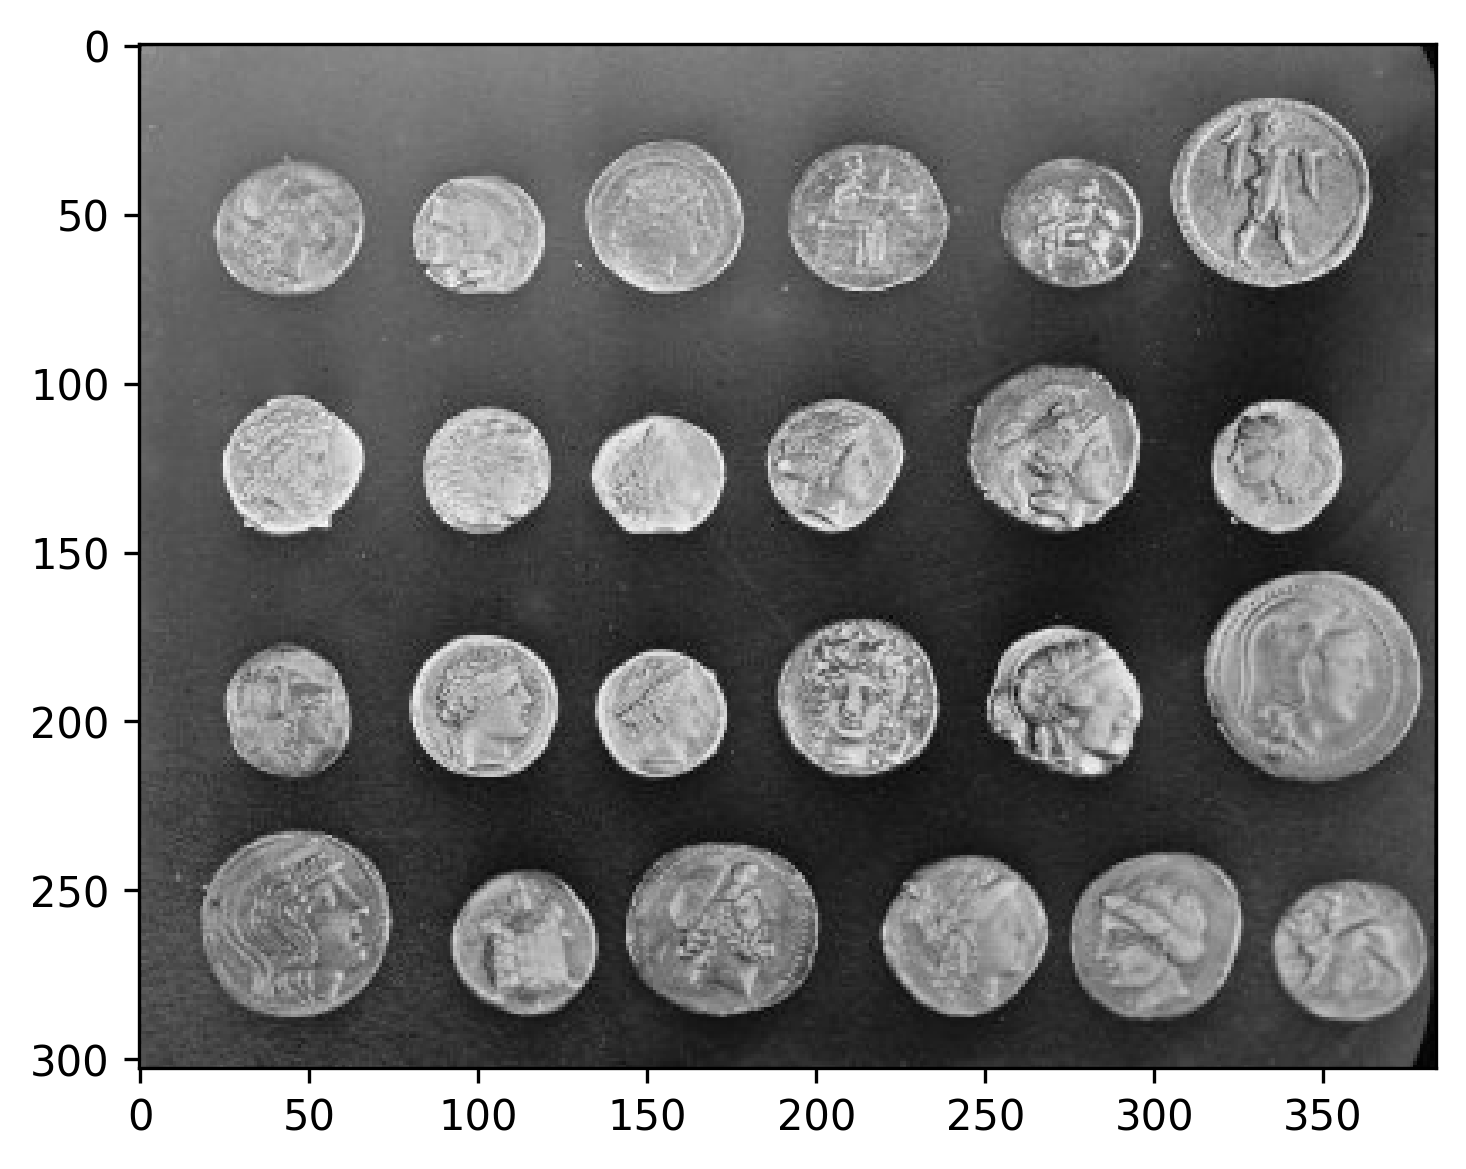

In [4]:
%matplotlib inline
from skimage import io, data
from matplotlib import pyplot as plt

plt.figure(dpi=300)

coins = data.coins()
io.imshow(coins)

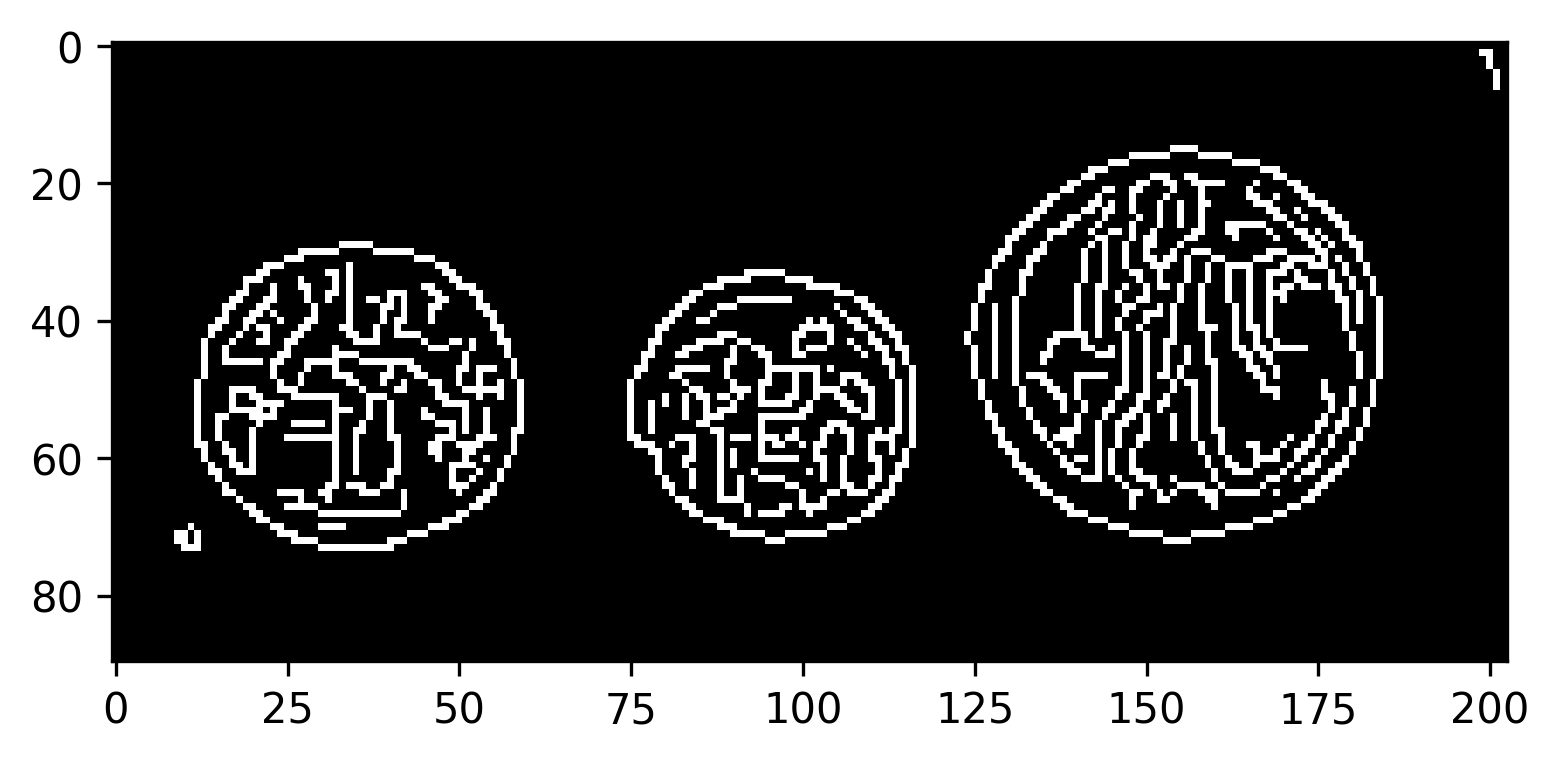

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from skimage import feature

plt.figure(dpi=300)

# Get pixels 180 to the end in the X direction
x0, x1 = 180, -1
# Get pixels 0 to 90 in the Y direction 
y0, y1 = 0, 90
# Slice the image so only the top-right three coins are visible
three_coins = coins[y0:y1, x0:x1]
# Apply the canny algorithm
plt.imshow(feature.canny(three_coins), cmap='gray')

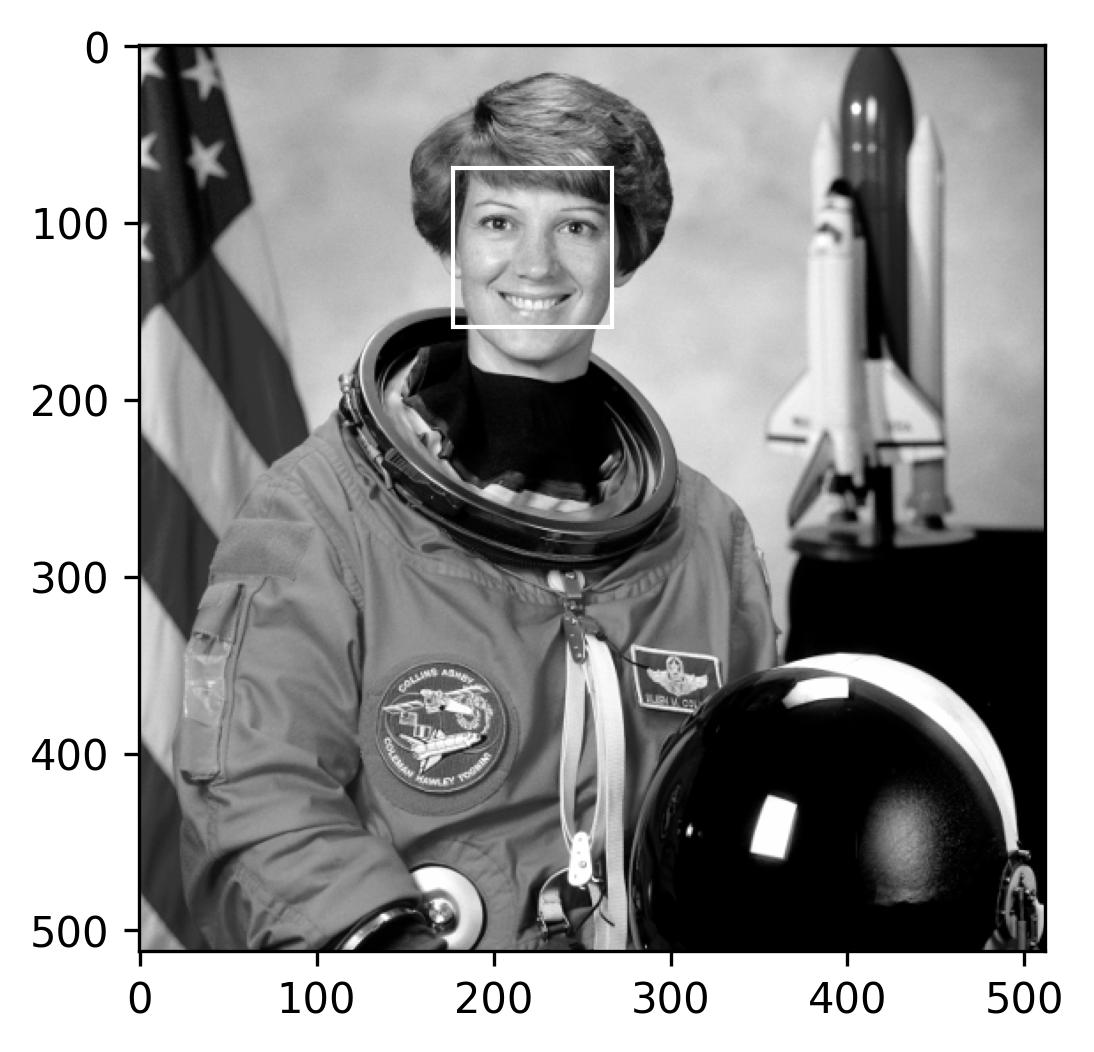

In [3]:
%matplotlib inline
from skimage import data
from skimage.feature import Cascade

# We are using matplotlib directly so we can
# draw on the rendered output
import matplotlib.pyplot as plt
from matplotlib import patches

dpi = 300
color = 'white'
thickness = 1
step_ratio = 1
scale_factor = 1.2
min_object_size = 60, 60
max_object_size = 123, 123

# A photo of Astronaut Eileen Collins
img = data.astronaut()

# Plot the image as high resolution in grayscale
plt.figure(dpi=dpi)
plt.imshow(img.mean(axis=2), cmap='gray')

# Load the trained file and initialize the detector cascade.
detector = Cascade(data.lbp_frontal_face_cascade_filename())

# Apply the detector to find faces of varying sizes
out = detector.detect_multi_scale(
    img=img, step_ratio=step_ratio, scale_factor=scale_factor,
    min_size=min_object_size, max_size=max_object_size)

img_desc = plt.gca()
for box in out:
    # Draw a rectangle for every detected face
    img_desc.add_patch(patches.Rectangle(
        # Col and row as X and Y respectively
        (box['c'], box['r']), box['width'], box['height'],
        fill=False, color=color, linewidth=thickness))
